<h1 align="center">Handwritten Digits and Predictions using SVD</h1>

In [72]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [73]:
# Load the handwritten digits dataset
digits = load_digits()

In [74]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [75]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [76]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [77]:
# Apply Singular Value Decomposition (SVD) for dimensionality reduction
n_components = 30  # Number of components to keep after dimensionality reduction
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_train_svd = svd.fit_transform(X_train_scaled)
X_test_svd = svd.transform(X_test_scaled)


In [78]:
# Train a logistic regression classifier
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train_svd, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [79]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_svd)


In [80]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9583333333333334


In [81]:
# Select a random test sample and display the image along with the predicted label
index = np.random.randint(0, len(X_test))
sample_image = X_test[index].reshape(8, 8)  # Reshape the image to its original shape (8x8)


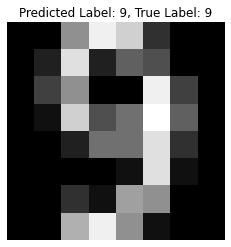

In [82]:

plt.gray()
plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted Label: {y_pred[index]}, True Label: {y_test[index]}")
plt.axis('off')
plt.show()

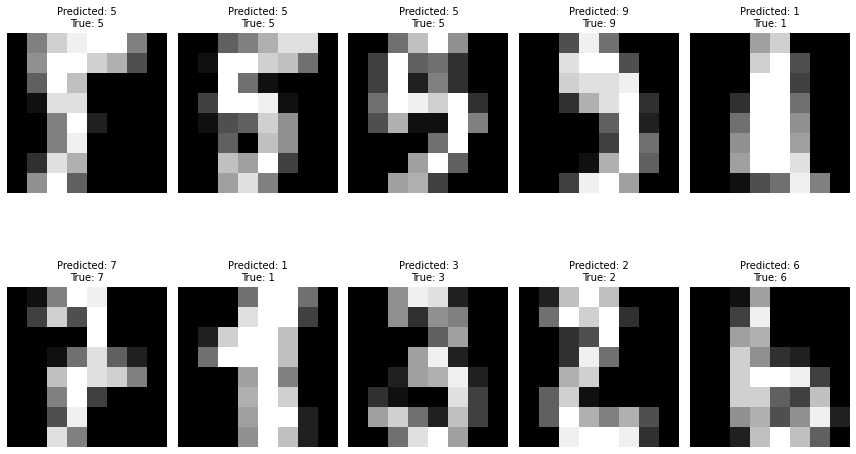

In [83]:
# Select a random subset of test samples and display the images along with the predicted labels
num_samples = 10
selected_indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(selected_indices):
    plt.subplot(2, 5, i + 1)
    sample_image = X_test[idx].reshape(8, 8)  # Reshape the image to its original shape (8x8)
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Predicted: {y_pred[idx]}\nTrue: {y_test[idx]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()